# Data Science com Python

### Módulo 5 - Modelagem Clustering

***Professor: Lucas Roberto Correa***

LEMBRETE: Fazer o import dos datasets usados no ambiente do colab antes de executar os comandos.

### Import dos pacotes

In [31]:
# Manipulação dados
import pandas as pd

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Pre processamento
from sklearn.preprocessing import StandardScaler

# Modelos de agrupamento
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

#Métricas
from sklearn.metrics import silhouette_score

# Limpeza de memória
import gc

In [32]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

#### Import dos metadados

link da base: https://www.kaggle.com/rashmiranu/banking-dataset-classification?select=new_train.csv

In [33]:
meta = pd.read_excel('metadata.xlsx')

In [34]:
meta

,Feature,Feature_Type,Description
0,age,numeric,age of a person
1,job,"Categorical,nominal","type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')"
2,marital,"categorical,nominal","marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)"
3,education,"categorical,nominal","('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')"
4,default,"categorical,nominal","has credit in default? ('no','yes','unknown')"
5,housing,"categorical,nominal","has housing loan? ('no','yes','unknown')"
6,loan,"categorical,nominal","has personal loan? ('no','yes','unknown')"
7,contact,"categorical,nominal","contact communication type ('cellular','telephone')"
8,month,"categorical,ordinal","last contact month of year ('jan', 'feb', 'mar', …, 'nov', 'dec')"
9,dayofweek,"categorical,ordinal","last contact day of the week ('mon','tue','wed','thu','fri')"


#### Import da base

In [35]:
df = pd.read_csv('new_train.csv', sep=',')

In [36]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


#### Retirando a target, pois o conjunto de dados será usado para uma análise não supervionada

In [37]:
expl = df.drop(columns=['y'], axis=1)
expl.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent


In [38]:
expl_cat = expl[['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month','poutcome']]

In [39]:
expl_num = expl[['duration', 'campaign', 'pdays', 'previous']]

Resultado a ser considerado na modelagem

In [40]:
expl_num.head()

,duration,campaign,pdays,previous
0,227,4,999,0
1,202,2,999,1
2,1148,1,999,0
3,120,2,999,0
4,368,2,999,0


Checagem de nulos

In [41]:
expl_num.isnull().sum()

duration    0
campaign    0
pdays       0
previous    0
dtype: int64

Transformação dos dados com Padronização

In [42]:
'''
z = (x - u) / s
onde `u` é a média na amostra de train,`s` é o desvio padrão da amostra.
'''

scale = StandardScaler()

In [43]:
expl_num_scale = scale.fit_transform(expl_num)

In [44]:
expl_num_scale

array([[-0.12019627,  0.52298128,  0.19658384, -0.35012691],
       [-0.2167318 , -0.20368791,  0.19658384,  1.65381294],
       [ 3.43617293, -0.56702251,  0.19658384, -0.35012691],
       ...,
       [-0.49089273,  0.52298128,  0.19658384, -0.35012691],
       [-0.3596044 , -0.56702251,  0.19658384, -0.35012691],
       [ 1.10387435,  0.15964669,  0.19658384, -0.35012691]])

In [45]:
del df

In [46]:
gc.collect()

756

#### O algoritmo

In [47]:
km = KMeans(n_clusters=5, random_state=42)
km

KMeans(n_clusters=5, random_state=42)

In [48]:
agg = AgglomerativeClustering(n_clusters=5)
agg

AgglomerativeClustering(n_clusters=5)

#### Aplicando no conjunto de dados

In [49]:
expl['km_05'] = km.fit_predict(expl_num_scale)

In [50]:
expl['agg_05'] = agg.fit_predict(expl_num_scale)

In [51]:
gc.collect()

253

#### Avaliação de métrica

In [52]:
# Kmeans

centroides = [2,3,4,5,6,7,8,9,10]

for num_centroide in centroides:
    clusters = KMeans(n_clusters=num_centroide)
    predicao = clusters.fit_predict(expl_num_scale)
    
    score = silhouette_score(expl_num_scale, predicao)
    print('O valor de silhouette_score é {}, para n_clusters igual a {}'.format(score, num_centroide))

O valor de silhouette_score é 0.7402315385741535, para n_clusters igual a 2
O valor de silhouette_score é 0.49370005842359754, para n_clusters igual a 3
O valor de silhouette_score é 0.5351424511751384, para n_clusters igual a 4
O valor de silhouette_score é 0.5835357761705634, para n_clusters igual a 5
O valor de silhouette_score é 0.5097146809826781, para n_clusters igual a 6
O valor de silhouette_score é 0.4984423997440828, para n_clusters igual a 7
O valor de silhouette_score é 0.4993336457007373, para n_clusters igual a 8
O valor de silhouette_score é 0.4847810948605838, para n_clusters igual a 9
O valor de silhouette_score é 0.4583793318818555, para n_clusters igual a 10


In [53]:
# Aglomerativo
n_clusters = [2,3,4,5,6,7,8,9,10]

for num_cluster in n_clusters:
    clusters = AgglomerativeClustering(n_clusters=num_cluster)
    predicao = clusters.fit_predict(expl_num_scale)
    
    score = silhouette_score(expl_num_scale, predicao)

    print('O valor de silhouette_score é {}, para n_clusters igual a {}'.format(score, num_cluster))

O valor de silhouette_score é 0.7400764067995907, para n_clusters igual a 2
O valor de silhouette_score é 0.46001091987589987, para n_clusters igual a 3
O valor de silhouette_score é 0.5182638090537325, para n_clusters igual a 4
O valor de silhouette_score é 0.5438837083028822, para n_clusters igual a 5
O valor de silhouette_score é 0.4623811376016544, para n_clusters igual a 6
O valor de silhouette_score é 0.4437816163884292, para n_clusters igual a 7
O valor de silhouette_score é 0.41209524550135684, para n_clusters igual a 8
O valor de silhouette_score é 0.41165993887296853, para n_clusters igual a 9
O valor de silhouette_score é 0.3859081975419649, para n_clusters igual a 10


In [54]:
gc.collect()

150

#### Avaliação dos resultados considerando os dados de explicativas categóricas

In [55]:
expl.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,km_05,agg_05
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,0,0
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,2,3
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,4,2
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,0,0
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,0,0


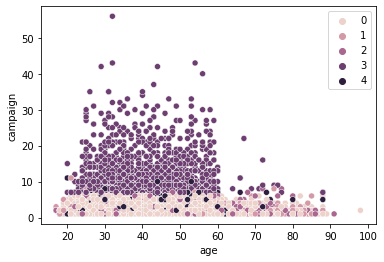

In [56]:
sns.scatterplot(data=expl, x="age", y="campaign", hue=km.labels_)

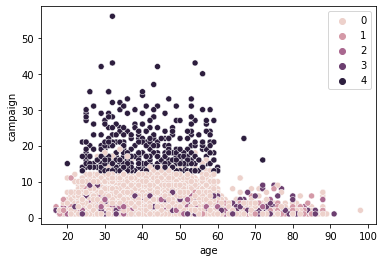

In [57]:
sns.scatterplot(data=expl, x="age", y="campaign", hue=agg.labels_)

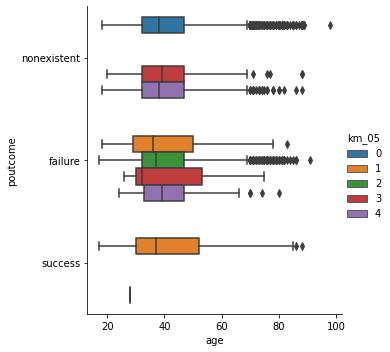

In [58]:
sns.catplot(x="age", y="poutcome", hue="km_05", kind="box", data=expl)

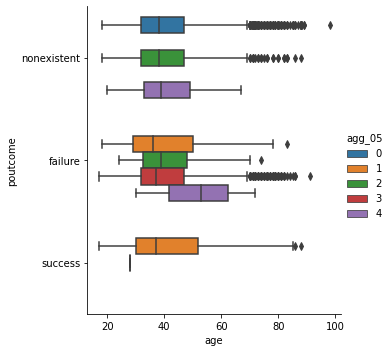

In [59]:
sns.catplot(x="age", y="poutcome", hue="agg_05", kind="box", data=expl)